# DNN Keras MNIST

In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear  
# inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.fetch_mldata("MNIST Original")
# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

[INFO] loading MNIST (full) dataset...


/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

In [5]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [6]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 3s 60us/step - loss: 2.2881 - acc: 0.1716 - val_loss: 2.2464 - val_acc: 0.3300
Epoch 2/100
52500/52500 [==============================] - 2s 46us/step - loss: 2.2154 - acc: 0.3908 - val_loss: 2.1822 - val_acc: 0.4693
Epoch 3/100
52500/52500 [==============================] - 2s 46us/step - loss: 2.1395 - acc: 0.5352 - val_loss: 2.0920 - val_acc: 0.5390
Epoch 4/100
52500/52500 [==============================] - 2s 46us/step - loss: 2.0350 - acc: 0.6119 - val_loss: 1.9692 - val_acc: 0.6262
Epoch 5/100
52500/52500 [==============================] - 2s 44us/step - loss: 1.8898 - acc: 0.6521 - val_loss: 1.8024 - val_acc: 0.6687
Epoch 6/100
52500/52500 [==============================] - 2s 42us/step - loss: 1.7055 - acc: 0.6767 - val_loss: 1.6040 - val_acc: 0.6813
Epoch 7/100
52500/52500 [==============================] - 2s 40us/step - loss: 1.5055 - acc: 0

52500/52500 [==============================] - 2s 46us/step - loss: 0.3230 - acc: 0.9082 - val_loss: 0.3359 - val_acc: 0.9046
Epoch 60/100
52500/52500 [==============================] - 2s 46us/step - loss: 0.3211 - acc: 0.9088 - val_loss: 0.3336 - val_acc: 0.9048
Epoch 61/100
52500/52500 [==============================] - 2s 46us/step - loss: 0.3194 - acc: 0.9089 - val_loss: 0.3317 - val_acc: 0.9048
Epoch 62/100
52500/52500 [==============================] - 2s 46us/step - loss: 0.3177 - acc: 0.9092 - val_loss: 0.3302 - val_acc: 0.9057
Epoch 63/100
52500/52500 [==============================] - 2s 46us/step - loss: 0.3160 - acc: 0.9098 - val_loss: 0.3286 - val_acc: 0.9058
Epoch 64/100
52500/52500 [==============================] - 2s 43us/step - loss: 0.3143 - acc: 0.9103 - val_loss: 0.3272 - val_acc: 0.9062
Epoch 65/100
52500/52500 [==============================] - 2s 46us/step - loss: 0.3127 - acc: 0.9108 - val_loss: 0.3257 - val_acc: 0.9062
Epoch 66/100
52500/52500 [==============

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classes))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1698
           1       0.95      0.97      0.96      1990
           2       0.92      0.89      0.90      1708
           3       0.90      0.88      0.89      1786
           4       0.91      0.94      0.92      1705
           5       0.88      0.86      0.87      1541
           6       0.93      0.96      0.94      1675
           7       0.93      0.93      0.93      1846
           8       0.89      0.88      0.88      1725
           9       0.91      0.89      0.90      1826

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



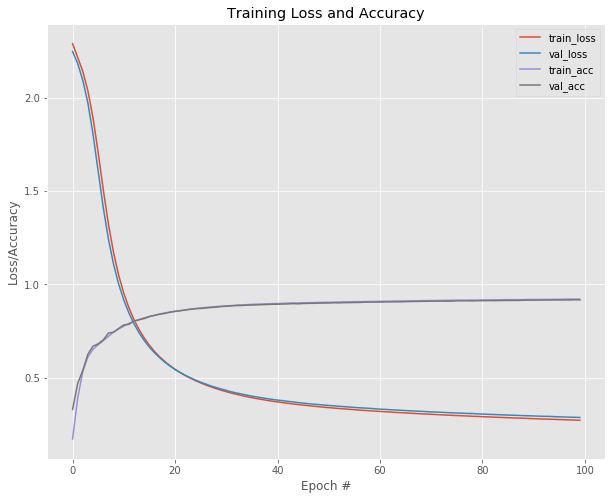

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done